# Préparation des donnés

Faire un tableau de best prediction de tous les descritpteurs par rapport a celle bien predite par le random

In [46]:
# Import numerical libraries.  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score

#Librairies
import time
import torch
import random

#Raccourcis utilisé
from tqdm import tqdm_notebook
import torch.nn as nn
import torch.utils.data as data_utils
import pandas as pd


import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adamax, Nadam
from sklearn.model_selection import train_test_split
from math import exp
from itertools import cycle

In [47]:
dfX = pd.read_csv('Molecular Dataset Dream 1.csv',sep=';')
dfY = pd.read_csv('Senteur Dataset Dream 1.csv',sep=';')
#Dataset pour classification Binaire
dfXB = pd.read_csv('Molecular Dataset Dream 1.csv',sep=';')
dfYB = pd.read_csv('Senteur_Dataset_Binaire_Dream_1.csv',sep=';')

On notera que pour la classification binaire il faut effectuer les petits changements au niveau de l'architecture du model explicité dans le rapport pdf.

In [48]:
df = dfX.merge(dfY)
df

,Unnamed: 0,CID,complexity from pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,...,ACID,WARM,MUSKY,SWEATY,AMMONIA/URINOUS,DECAYED,WOOD,GRASS,FLOWER,CHEMICAL
0,0,126,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,126,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,126,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,126,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,126,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,...,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29334,29334,16220109,5.867,5.670,1.804,2.579,3.128,2.657,3.275,0.821,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
29335,29335,16220109,5.867,5.670,1.804,2.579,3.128,2.657,3.275,0.821,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29336,29336,16220109,5.867,5.670,1.804,2.579,3.128,2.657,3.275,0.821,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
29337,29337,16220109,5.867,5.670,1.804,2.579,3.128,2.657,3.275,0.821,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


On remarque que la colonne 'Unnamed 0' qui sert à marger les 2 dataframe est complètement fausser. 
On se retrouve donc à prédire la classe 'INTENSITY/STRENGTH' avec les mauvais descripteurs.

In [49]:
list_labelY = ['subject','INTENSITY/STRENGTH']
list_labelY2 = ['subject','SWEET']
list_label = ['INTENSITY/STRENGTH', 'VALENCE/PLEASANTNESS', 'BAKERY', 'SWEET',
       'FRUIT', 'FISH', 'GARLIC', 'SPICES', 'COLD', 'SOUR', 'BURNT', 'ACID',
       'WARM', 'MUSKY', 'SWEATY', 'AMMONIA/URINOUS', 'DECAYED', 'WOOD',
       'GRASS', 'FLOWER', 'CHEMICAL']

In [50]:
dfY = df[list_labelY]
dfX = df
dfX = dfX.drop(list_label,axis=1)
dfX = dfX.drop('Unnamed: 0',axis=1)
dfX = dfX.drop('CID',axis=1)

In [51]:
dfX

,complexity from pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,...,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50,Compound Identifier,Intensity,Dilution,subject
0,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,1.006,0.879,...,0,0,0,0,0,0,126,0,1,1
1,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,1.006,0.879,...,0,0,0,0,0,0,126,1,0,1
2,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,1.006,0.879,...,0,0,0,0,0,0,126,0,1,2
3,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,1.006,0.879,...,0,0,0,0,0,0,126,1,0,2
4,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,1.006,0.879,...,0,0,0,0,0,0,126,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29334,5.867,5.670,1.804,2.579,3.128,2.657,3.275,0.821,0.995,0.845,...,1,0,1,0,1,0,16220109,1,0,47
29335,5.867,5.670,1.804,2.579,3.128,2.657,3.275,0.821,0.995,0.845,...,1,0,1,0,1,0,16220109,0,1,48
29336,5.867,5.670,1.804,2.579,3.128,2.657,3.275,0.821,0.995,0.845,...,1,0,1,0,1,0,16220109,1,0,48
29337,5.867,5.670,1.804,2.579,3.128,2.657,3.275,0.821,0.995,0.845,...,1,0,1,0,1,0,16220109,0,1,49


## Test sur le réseau neuronal

In [52]:
dfY=dfY.drop('subject',axis=1)

In [53]:
def to_class(y_):
    res = np.zeros((len(y_), 11), dtype='q')
    for i in range(len(y_)):
        res[i][int(y_[i])] = 1
    return res

In [54]:
dataX = np.float32(dfX.values)
dataY = np.longlong(dfY.values)
dataY = to_class(dataY)

In [55]:
# Normalisation
sc = StandardScaler()
dataX = sc.fit_transform(dataX)

In [56]:
DATA_Train, DATA_Test, TARGET_Train, TARGET_Test = train_test_split(dataX, dataY ,test_size=0.2)

In [57]:
## PyTorch is used to working with batches.
Batch=300

X_train_tensor = torch.from_numpy(DATA_Train)
Y_train_tensor = torch.from_numpy(TARGET_Train) 

X_test_tensor = torch.from_numpy(DATA_Test)
Y_test_tensor = torch.from_numpy(TARGET_Test)

train = data_utils.TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = data_utils.DataLoader(train, batch_size=Batch, shuffle=True)

test = data_utils.TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = data_utils.DataLoader(test, batch_size=Batch, shuffle=True)

In [58]:
class MyNetwork(nn.Module):

    def __init__(self):
        super(MyNetwork, self).__init__()
        
        ## Activation layer
        self.relu = nn.ReLU()
        
        self.fc1 = nn.Linear(in_features = 3083, out_features = 2400)
        self.fc2 = nn.Linear(2400, 1200)  
        self.fc3 = nn.Linear(1200, 600)
        self.output = nn.Linear(600, 11)
        self.softmax = nn.LogSoftmax(dim=1)
        self.dr = nn.Dropout(0.3)
        
    def forward(self, x):

    ## First full connection
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dr(x)
    
    ## Second full connection
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dr(x)
        
    ## Third full connection
        x = self.fc3(x)
        x = self.relu(x)
        x = self.dr(x)
        
    ## Output layer
        x = self.output(x)
        y = self.softmax(x)
        
        return y

In [59]:
X_train_tensor.shape

torch.Size([23471, 3083])

In [60]:
## Create an instance of our network
net = MyNetwork()

In [61]:
net = MyNetwork()
net = net.cuda()

LEARNING_RATE = 0.003
MOMENTUM = 0.9

criterion = nn.NLLLoss()
#criterion = nn.CrossEntropyLoss

# Méthode stochastique de descente du grandient 
optimizer = torch.optim.SGD(net.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)

In [62]:
## Nombre d'époque d'apprentissage
N_EPOCHS = 30

epoch_loss, epoch_acc, epoch_val_loss, epoch_val_acc = [], [], [], []
start_time = time.time()

for e in range(N_EPOCHS):
  
    print("EPOCH:",e)

    ### boucle d'entraineement
    running_loss = 0
    running_accuracy = 0
    running_acc=0
    start_epoch_time=time.time()

    ## Le réseau est mis en mode "entrainement"
    net.train()

    for i, batch in enumerate(tqdm_notebook(train_loader)):
    
        # Obtenir batch du dataloader
        x = batch[0]
        labels = batch[1]

        # déplacer le batch sur le GPU
        x = x.cuda()
        labels = labels.cuda()

        # Calcul de l'output et les loss
        output = net(x)
        y = output
        
        loss = criterion(y, torch.max(labels, 1)[1])

        # Réinitialisation du gradients
        optimizer.zero_grad()

        # Calculs du gradients
        loss.backward()

        # Appliquecation d'une étape d'optimisation de l'algorithme de descente pour mettre à jour les poids
        optimizer.step()

        with torch.no_grad():
            running_loss += loss.item()            
            running_accuracy += (y.max(1)[1] == torch.max(labels, 1)[1]).sum().item()

    print("Training accuracy:", running_accuracy/float(len(train)),
        "Training loss:", running_loss/float(len(train)))

    epoch_loss.append(running_loss/len(train))
    epoch_acc.append(running_accuracy/len(train))

    ### Boucle de valisation
    ## Le réseau est mis en mode validation
    net.eval()

    running_val_loss = 0
    running_val_accuracy = 0

    for i, batch in enumerate(tqdm_notebook(test_loader)):
    
        with torch.no_grad():
            
            x = batch[0]
            labels = batch[1]
            
            x = x.cuda()
            labels = labels.cuda()
            
            output = net(x)
            y = output

            loss = criterion(y, torch.max(labels, 1)[1])

            running_val_loss += loss.item()
            running_val_accuracy += (y.max(1)[1] == torch.max(labels, 1)[1]).sum().item()
    
    print("Validation accuracy:", running_val_accuracy/float(len(test)),
        "Validation loss:", running_val_loss/float(len(test)))

    epoch_val_loss.append(running_val_loss/len(test))
    epoch_val_acc.append(running_val_accuracy/len(test))
    
    inter = time.time() - start_epoch_time  
    print ('Temps de l Epoch ',e,' en secondes:', inter )
    

interval = time.time() - start_time  
print ('Temps total en secondes:', interval )



EPOCH: 0


C:\Users\benja\anaconda3\lib\site-packages\ipykernel_launcher.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Training accuracy: 0.14779941204039027 Training loss: 0.007936493040355205


C:\Users\benja\anaconda3\lib\site-packages\ipykernel_launcher.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Validation accuracy: 0.16411042944785276 Validation loss: 0.007927924577443877
Temps de l Epoch  0  en secondes: 2.2553603649139404
EPOCH: 1



Training accuracy: 0.15674662349282092 Training loss: 0.007823948673057971



Validation accuracy: 0.16717791411042945 Validation loss: 0.007878334813160236
Temps de l Epoch  1  en secondes: 1.407196044921875
EPOCH: 2



Training accuracy: 0.15819521963273828 Training loss: 0.007782448369649845



Validation accuracy: 0.1659850034083163 Validation loss: 0.007847499343596435
Temps de l Epoch  2  en secondes: 1.3659226894378662
EPOCH: 3



Training accuracy: 0.16386178688594435 Training loss: 0.007749873053600413



Validation accuracy: 0.17348329925017042 Validation loss: 0.007820240884064491
Temps de l Epoch  3  en secondes: 1.3709042072296143
EPOCH: 4



Training accuracy: 0.16731285416045333 Training loss: 0.007717669581550239



Validation accuracy: 0.17263122017723245 Validation loss: 0.007786863176856792
Temps de l Epoch  4  en secondes: 1.3950538635253906
EPOCH: 5



Training accuracy: 0.17395935409654467 Training loss: 0.007689576181289278



Validation accuracy: 0.17842535787321062 Validation loss: 0.007754933614672327
Temps de l Epoch  5  en secondes: 1.386214017868042
EPOCH: 6



Training accuracy: 0.1784755655915811 Training loss: 0.007653776510701121



Validation accuracy: 0.18064076346284935 Validation loss: 0.007715985859504913
Temps de l Epoch  6  en secondes: 1.394502878189087
EPOCH: 7



Training accuracy: 0.18005197903796175 Training loss: 0.007611095867211429



Validation accuracy: 0.18643490115882755 Validation loss: 0.0076734675951530594
Temps de l Epoch  7  en secondes: 1.3660235404968262
EPOCH: 8



Training accuracy: 0.1884453154957181 Training loss: 0.007560443514517182



Validation accuracy: 0.19444444444444445 Validation loss: 0.007612367267907681
Temps de l Epoch  8  en secondes: 1.3695638179779053
EPOCH: 9



Training accuracy: 0.19347279621660773 Training loss: 0.007509812270161198



Validation accuracy: 0.2036468984321745 Validation loss: 0.00754966643202768
Temps de l Epoch  9  en secondes: 1.3837480545043945
EPOCH: 10



Training accuracy: 0.202249584593754 Training loss: 0.007433549052819462



Validation accuracy: 0.2091002044989775 Validation loss: 0.007468930498303892
Temps de l Epoch  10  en secondes: 1.4072883129119873
EPOCH: 11



Training accuracy: 0.20881087299220313 Training loss: 0.007362338519513869



Validation accuracy: 0.21779141104294478 Validation loss: 0.007398694489549924
Temps de l Epoch  11  en secondes: 1.3654506206512451
EPOCH: 12



Training accuracy: 0.21456265178305142 Training loss: 0.007307561365920457



Validation accuracy: 0.2230743012951602 Validation loss: 0.007327478356156612
Temps de l Epoch  12  en secondes: 1.3584086894989014
EPOCH: 13



Training accuracy: 0.21997358442333093 Training loss: 0.007253506609143175



Validation accuracy: 0.2222222222222222 Validation loss: 0.007313127369805917
Temps de l Epoch  13  en secondes: 1.3811168670654297
EPOCH: 14



Training accuracy: 0.22010140172979423 Training loss: 0.007223482842205847



Validation accuracy: 0.22597137014314927 Validation loss: 0.0073064794000834935
Temps de l Epoch  14  en secondes: 1.4317822456359863
EPOCH: 15



Training accuracy: 0.22248732478377573 Training loss: 0.007204784267595054



Validation accuracy: 0.2252897068847989 Validation loss: 0.007282461531729461
Temps de l Epoch  15  en secondes: 1.383476734161377
EPOCH: 16



Training accuracy: 0.22231690170849133 Training loss: 0.00719148590275123



Validation accuracy: 0.22614178595773687 Validation loss: 0.007278114780732865
Temps de l Epoch  16  en secondes: 1.3489844799041748
EPOCH: 17



Training accuracy: 0.22495845937539943 Training loss: 0.007175940871213314



Validation accuracy: 0.2278459441036128 Validation loss: 0.007309392226660585
Temps de l Epoch  17  en secondes: 1.3463613986968994
EPOCH: 18



Training accuracy: 0.22627923820885348 Training loss: 0.0071820742859157165



Validation accuracy: 0.22375596455351057 Validation loss: 0.0073007038847150325
Temps de l Epoch  18  en secondes: 1.3787853717803955
EPOCH: 19



Training accuracy: 0.2257679689830003 Training loss: 0.007162545075846655



Validation accuracy: 0.222733469665985 Validation loss: 0.0072888601533230585
Temps de l Epoch  19  en secondes: 1.3904099464416504
EPOCH: 20



Training accuracy: 0.2253845170636104 Training loss: 0.007159420041220041



Validation accuracy: 0.22886843899113837 Validation loss: 0.007266043113378253
Temps de l Epoch  20  en secondes: 1.367704153060913
EPOCH: 21



Training accuracy: 0.2259809978271058 Training loss: 0.0071503187514942185



Validation accuracy: 0.2254601226993865 Validation loss: 0.007261440147732745
Temps de l Epoch  21  en secondes: 1.367525339126587
EPOCH: 22



Training accuracy: 0.22734438242938093 Training loss: 0.0071546385759671625



Validation accuracy: 0.22903885480572597 Validation loss: 0.007263735231283821
Temps de l Epoch  22  en secondes: 1.3936965465545654
EPOCH: 23



Training accuracy: 0.2286225554940139 Training loss: 0.007148862113625956



Validation accuracy: 0.2258009543285617 Validation loss: 0.007277722942154669
Temps de l Epoch  23  en secondes: 1.362703800201416
EPOCH: 24



Training accuracy: 0.22951727663925695 Training loss: 0.0071408282475774005



Validation accuracy: 0.22648261758691207 Validation loss: 0.007250850226656466
Temps de l Epoch  24  en secondes: 1.3839445114135742
EPOCH: 25



Training accuracy: 0.23019896894039452 Training loss: 0.007131433594613349



Validation accuracy: 0.2254601226993865 Validation loss: 0.007270953609736988
Temps de l Epoch  25  en secondes: 1.343904972076416
EPOCH: 26



Training accuracy: 0.22968769971454134 Training loss: 0.007129866600158517



Validation accuracy: 0.2254601226993865 Validation loss: 0.007269685213144896
Temps de l Epoch  26  en secondes: 1.3389997482299805
EPOCH: 27



Training accuracy: 0.22917643048868816 Training loss: 0.0071247713337576



Validation accuracy: 0.22460804362644854 Validation loss: 0.007294329560038664
Temps de l Epoch  27  en secondes: 1.4352290630340576
EPOCH: 28



Training accuracy: 0.23156235354266969 Training loss: 0.007119266943472234



Validation accuracy: 0.2252897068847989 Validation loss: 0.007281716697136399
Temps de l Epoch  28  en secondes: 1.3788878917694092
EPOCH: 29



Training accuracy: 0.23143453623620638 Training loss: 0.007118225666504634



Validation accuracy: 0.2254601226993865 Validation loss: 0.0072575964404355126
Temps de l Epoch  29  en secondes: 1.358802080154419
Temps total en secondes: 42.21894955635071


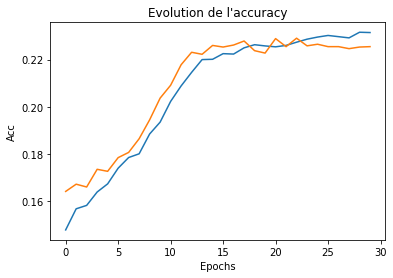

In [63]:
plt.plot(np.arange(0,N_EPOCHS),epoch_acc)
plt.plot(np.arange(0,N_EPOCHS),epoch_val_acc)
plt.title("Evolution de l'accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.show()

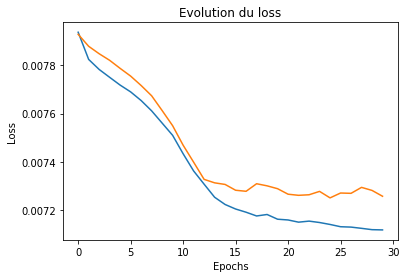

In [64]:
plt.plot(np.arange(0,N_EPOCHS),epoch_loss)
plt.plot(np.arange(0,N_EPOCHS),epoch_val_loss)
plt.title("Evolution du loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Keras

In [65]:
X_train = dataX #features
Y_train = dataY #labels

In [66]:
np.shape(X_train)

(29339, 3083)

In [67]:
x_train,x_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.2)
#y_train = to_class(y_train)
#y_test = to_class(y_test)

In [68]:
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

In [69]:
model = Sequential()
model.add(Dense(2400, activation='relu', input_dim=3083))
model.add(Dropout(0.3))
model.add(Dense(1200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(600, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(11, activation='softmax'))

In [70]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [71]:
history = model.fit(x_train, y_train, epochs=100, batch_size=1000, validation_data=(x_test,y_test), shuffle=True)
model.test_on_batch(x_test, y_test)
model.metrics_names

Train on 23471 samples, validate on 5868 samples
Epoch 1/100
23471/23471 [==============================] - 4s 187us/sample - loss: 3.3965 - acc: 0.1205 - val_loss: 2.3322 - val_acc: 0.1564
Epoch 2/100
23471/23471 [==============================] - 4s 181us/sample - loss: 2.3392 - acc: 0.1472 - val_loss: 2.2990 - val_acc: 0.1616
Epoch 3/100
23471/23471 [==============================] - 4s 180us/sample - loss: 2.3115 - acc: 0.1553 - val_loss: 2.2794 - val_acc: 0.1684
Epoch 4/100
23471/23471 [==============================] - 4s 179us/sample - loss: 2.2975 - acc: 0.1602 - val_loss: 2.2697 - val_acc: 0.1692
Epoch 5/100
23471/23471 [==============================] - 4s 185us/sample - loss: 2.2784 - acc: 0.1638 - val_loss: 2.2491 - val_acc: 0.1837
Epoch 6/100
23471/23471 [==============================] - 4s 189us/sample - loss: 2.2609 - acc: 0.1738 - val_loss: 2.2268 - val_acc: 0.2030
Epoch 7/100
23471/23471 [==============================] - 5s 203us/sample - loss: 2.2457 - acc: 0.1818 -

23471/23471 [==============================] - 5s 200us/sample - loss: 2.1322 - acc: 0.2240 - val_loss: 2.1518 - val_acc: 0.2212
Epoch 59/100
23471/23471 [==============================] - 5s 198us/sample - loss: 2.1312 - acc: 0.2242 - val_loss: 2.1356 - val_acc: 0.2324
Epoch 60/100
23471/23471 [==============================] - 5s 198us/sample - loss: 2.1275 - acc: 0.2248 - val_loss: 2.1335 - val_acc: 0.2289
Epoch 61/100
23471/23471 [==============================] - 5s 197us/sample - loss: 2.1291 - acc: 0.2241 - val_loss: 2.1463 - val_acc: 0.2214
Epoch 62/100
23471/23471 [==============================] - 5s 214us/sample - loss: 2.1295 - acc: 0.2236 - val_loss: 2.1359 - val_acc: 0.2299
Epoch 63/100
23471/23471 [==============================] - 5s 221us/sample - loss: 2.1254 - acc: 0.2232 - val_loss: 2.1371 - val_acc: 0.2268
Epoch 64/100
23471/23471 [==============================] - 5s 205us/sample - loss: 2.1267 - acc: 0.2259 - val_loss: 2.1469 - val_acc: 0.2255
Epoch 65/100
23471/

['loss', 'acc']

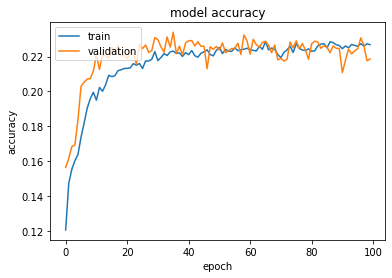

In [72]:
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

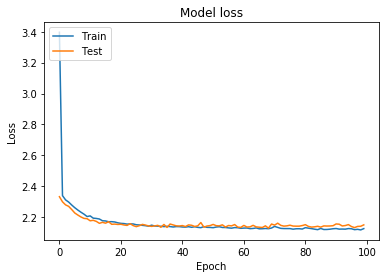

In [73]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [74]:
y_pred = model.predict(x_test)

In [75]:
# Compute ROC curve and ROC area for each class
n_classes = 11
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [76]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

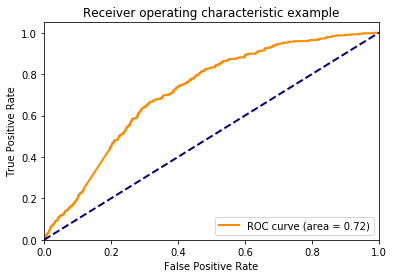

In [77]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [78]:
#Unique interpolation
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

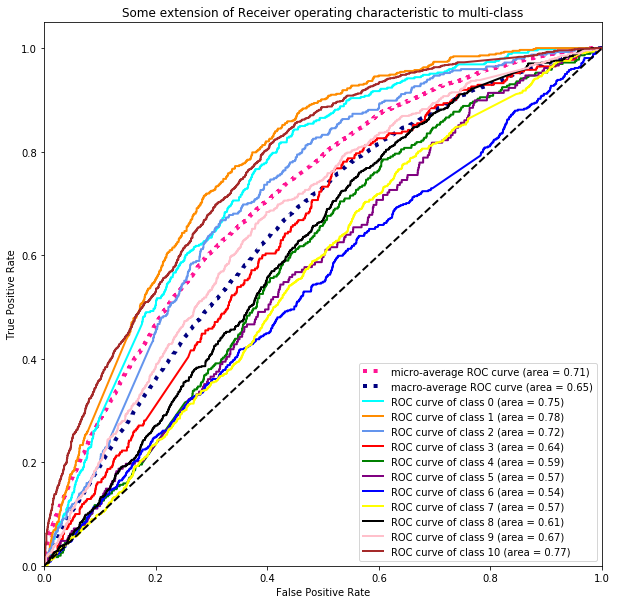

In [79]:
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'blue', 'yellow', 'black', 'pink', 'brown'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()    